# Lending Club Case Study

In [271]:
# import required python inbuilt libraries #

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [272]:
### Load file loan.csv ###
loan_data = pd.read_csv("loan.csv", low_memory=False)
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


# Analysing columns 
### Grade : Grade is a quality score assigned to loan applicant on the basis of credit history, quality of collateral and likelihood of repayment
### Term :  Duration of Loan
### Revol_util/Revol_bal : Revolving credit -> an open-ended credit account that can be used and paid down repeatedly as long as the account remains open and in good standing.

## Check Data Quality Issues

In [273]:
print(loan_data.shape)

(39717, 111)


In [274]:
### check null value count for all the columns
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [275]:
#### Find out the columns having null values > 36000 and store in a list ####
columns_with_null_values = loan_data.columns[loan_data.isnull().sum() > 36000]
print(columns_with_null_values)

Index(['mths_since_last_record', 'next_pymnt_d', 'mths_since_last_major_derog',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util',
       'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op',
       'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc',
       'mths_since_recent_bc_dlq', 'mths_since_recent_inq',
       'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd',
       'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl',
       'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0',
       'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m',
 

In [276]:
### Remove all the columns having null values > 36000 and store the updated data in a new DF "df" ###
df = loan_data.drop(columns_with_null_values, axis = 1)

In [277]:
### Check Shape of new Data Frame ###
print(df.shape)
##### Count of null values in new Data Frame 'df' #####
df.isnull().sum()

(39717, 55)


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

#### Action :  column 'desc' --> 'Loan description provided by the borrower' Null value count = 12940 and doesn't looks useful for our analysis and can be dropped

   

In [278]:
df = df.drop("desc", axis = 1)

## Analyse column 'emp_title'

In [279]:

df.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

#### Action : There are approx 28k unique employee title. column can be dropped

In [280]:
df = df.drop("emp_title", axis = 1)

## Analyse column 'mths_since_last_delinq'

In [281]:
print(df.mths_since_last_delinq.value_counts())
print(df.mths_since_last_delinq.isna().sum())

0.0      443
15.0     252
30.0     247
23.0     247
24.0     241
        ... 
89.0       1
107.0      1
85.0       1
97.0       1
95.0       1
Name: mths_since_last_delinq, Length: 95, dtype: int64
25682


#### Action : Null value count for 'mths_since_last_delinq' is huge . Drop the column

In [282]:
df = df.drop("mths_since_last_delinq", axis = 1)

### Action : Drop columns which are not useful for our analysis

In [283]:
df = df.drop("url", axis = 1)
df = df.drop("pymnt_plan", axis = 1)
df = df.drop("initial_list_status", axis = 1)
df = df.drop("title", axis = 1) # 17K unique title, column can be removed
df = df.drop("out_prncp", axis = 1)
df = df.drop("out_prncp_inv", axis = 1)
df = df.drop("policy_code", axis = 1)
df = df.drop("collections_12_mths_ex_med", axis = 1)
df = df.drop("application_type", axis = 1)
df = df.drop("acc_now_delinq", axis = 1)
df = df.drop("chargeoff_within_12_mths", axis = 1)
df = df.drop("tax_liens", axis = 1)

## Analyse column 'loan_status'

In [284]:
df.loan_status.value_counts()

Fully Paid     32950
Charged Off     5627
Current         1140
Name: loan_status, dtype: int64

In [285]:
##### We intrested to analyse data for Customers who have fully paid or Default the payments #####
##### Remove data from customer whose data loan status is 'Current' #####
df1 = df[df.loan_status != 'Current']
df1.shape

(38577, 40)

In [286]:

df.isnull().sum()

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_length                 1075
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
purpose                       0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                   50
total_acc                     0
total_pymnt                   0
total_pymnt_inv               0
total_rec_prncp               0
total_re

# Check Data type of columns, Change the data type if necessary

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [288]:
df.shape

(39717, 40)

In [289]:
df.int_rate 

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

In [290]:
## remove '%' from the int_rate and revol_util and change data type to numeric ###
df.int_rate = df.int_rate.apply(lambda x: pd.to_numeric(x.rstrip('%')))
df.revol_util = df.revol_util.fillna('0%')
df.revol_util = df.revol_util.apply(lambda x: pd.to_numeric(x.rstrip('%')))

In [291]:
df.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

In [292]:
##### We intrested to analyse data for Customers who have fully paid or Default the payments #####\
##### Remove data from customer whose data loan status is 'Current' #####
df1 = df[df.loan_status != 'Current']
df1.shape

(38577, 40)

In [293]:
### Add column which contains numeric value corresponding to Loan Status 'Fully Paid' -> 1, 'Charged Off' -> 0
df1["Loan_status_numeric"] = df1.loan_status.apply(lambda x: 1 if x == 'Fully Paid' else 0)


# Univariate Analysis

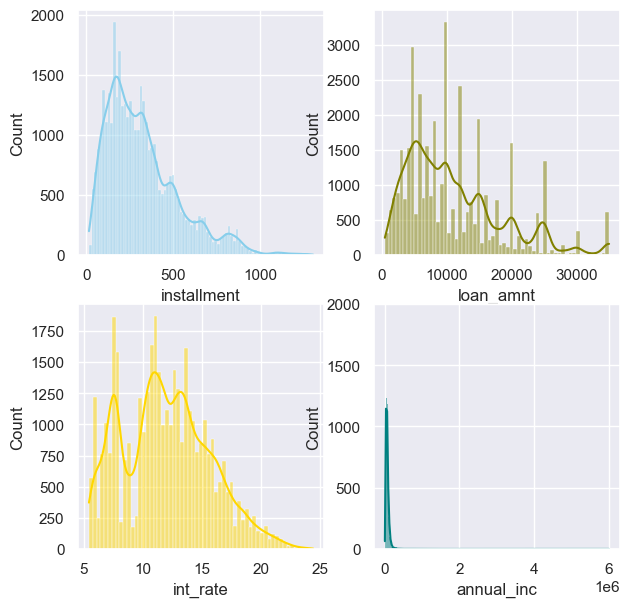

In [294]:
## Check the distribution of installment, loan_amnt, int_rate, annual_inc
sns.set(style="darkgrid")

fig, axs = plt.subplots(2, 2, figsize=(7, 7))

sns.histplot(data=df1, x="installment", kde=True, color="skyblue", ax=axs[0, 0])
sns.histplot(data=df1, x="loan_amnt", kde=True, color="olive", ax=axs[0, 1])
sns.histplot(data=df1, x="int_rate", kde=True, color="gold", ax=axs[1, 0])
sns.histplot(data=df1, x="annual_inc", kde=True, color="teal", ax=axs[1, 1])

plt.show()

### Univariate Analisys for column 'installment'

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fc9511de610>, <matplotlib.lines.Line2D object at 0x7fc9511dea30>], 'caps': [<matplotlib.lines.Line2D object at 0x7fc9511f40a0>, <matplotlib.lines.Line2D object at 0x7fc9511f4610>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fc9511dee80>], 'medians': [<matplotlib.lines.Line2D object at 0x7fc9a1dc2040>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fc9a1dc29a0>], 'means': []}


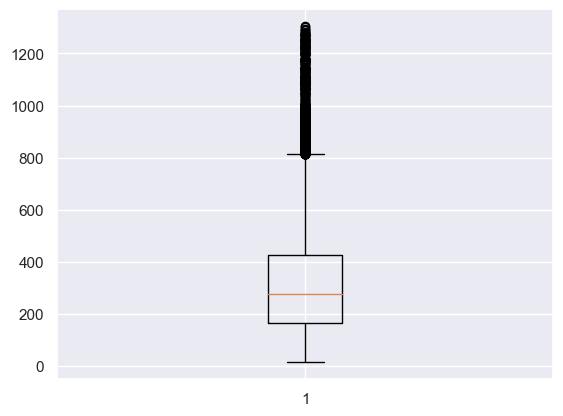

In [295]:
print(plt.boxplot(df1.installment))

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fc9c1c63c70>, <matplotlib.lines.Line2D object at 0x7fc9c1c63700>], 'caps': [<matplotlib.lines.Line2D object at 0x7fc9b21cb670>, <matplotlib.lines.Line2D object at 0x7fc9b21cb340>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fc9c1c63df0>], 'medians': [<matplotlib.lines.Line2D object at 0x7fc9b21cbd90>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fc9b21cb970>], 'means': []}


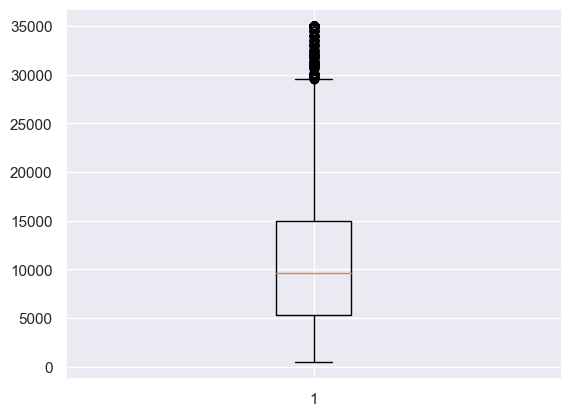

In [296]:
print(plt.boxplot(df1.loan_amnt))

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fc9c1c29fa0>, <matplotlib.lines.Line2D object at 0x7fc9c1c298b0>], 'caps': [<matplotlib.lines.Line2D object at 0x7fc9c1c29790>, <matplotlib.lines.Line2D object at 0x7fc9c1c29af0>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fc9c1c29850>], 'medians': [<matplotlib.lines.Line2D object at 0x7fc9c1c0be50>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fc9c1c0b970>], 'means': []}


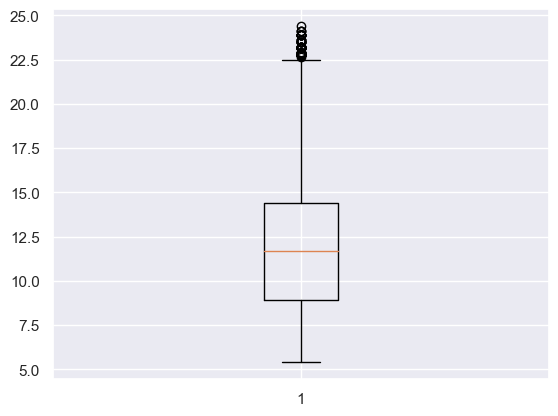

In [297]:
print(plt.boxplot(df1.int_rate))

{'whiskers': [<matplotlib.lines.Line2D object at 0x7fc9a28fcfa0>, <matplotlib.lines.Line2D object at 0x7fc9a28fcf70>], 'caps': [<matplotlib.lines.Line2D object at 0x7fc9a28fc490>, <matplotlib.lines.Line2D object at 0x7fc9a28fc130>], 'boxes': [<matplotlib.lines.Line2D object at 0x7fc9a28fc040>], 'medians': [<matplotlib.lines.Line2D object at 0x7fc9b32f09d0>], 'fliers': [<matplotlib.lines.Line2D object at 0x7fc9b32f0460>], 'means': []}


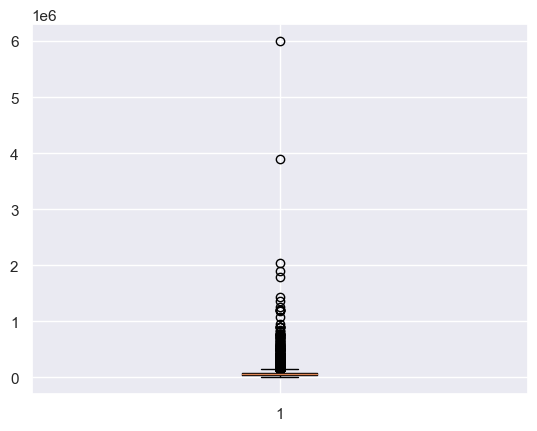

In [298]:
print(plt.boxplot(df1.annual_inc))

In [299]:
df1.installment.describe()

count    38577.000000
mean       322.466318
std        208.639215
min         15.690000
25%        165.740000
50%        277.860000
75%        425.550000
max       1305.190000
Name: installment, dtype: float64

In [300]:
df1.installment[df.installment > 1000].count()

235

# Segmented Univariate Analysis

<AxesSubplot:title={'center':'Average Intrest Rate paid by Defaulters and Non Defaulters'}, xlabel='Loan Status', ylabel='Intrest Rate'>

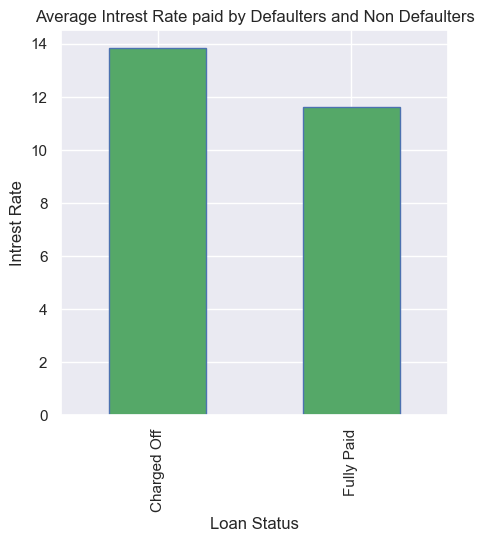

In [301]:
## check average intrest rate paid by defaulters and non-defaulters
df1.groupby(["loan_status"])["int_rate"].mean().plot(figsize = (5,5), title = "Average Intrest Rate paid by Defaulters and Non Defaulters", xlabel = "Loan Status", ylabel = "Intrest Rate", kind = 'bar', facecolor ='g' , edgecolor = 'b')

## As per above analysis , high intrest rate leads to more loan defaulters .

<AxesSubplot:title={'center':'Average Loan Amount taken by Defaulters and Non Defaulters'}, xlabel='Loan Status', ylabel='Loan Amount'>

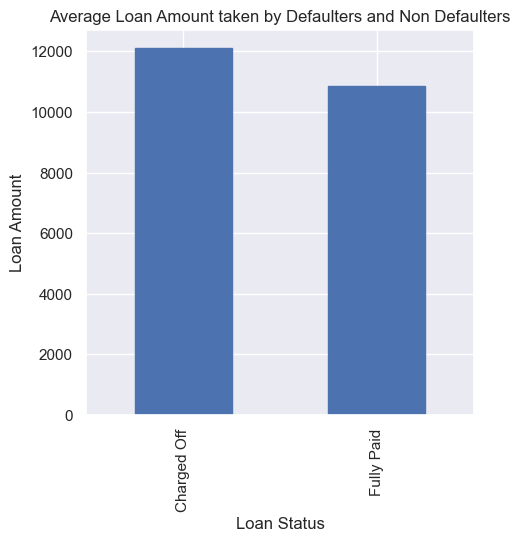

In [302]:
df1.groupby(["loan_status"])["loan_amnt"].mean().plot(figsize = (5,5), title = "Average Loan Amount taken by Defaulters and Non Defaulters", xlabel = "Loan Status", ylabel = "Loan Amount", kind = 'bar', facecolor ='b' , edgecolor = 'b')

In [303]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       38577 non-null  int64  
 1   member_id                38577 non-null  int64  
 2   loan_amnt                38577 non-null  int64  
 3   funded_amnt              38577 non-null  int64  
 4   funded_amnt_inv          38577 non-null  float64
 5   term                     38577 non-null  object 
 6   int_rate                 38577 non-null  float64
 7   installment              38577 non-null  float64
 8   grade                    38577 non-null  object 
 9   sub_grade                38577 non-null  object 
 10  emp_length               37544 non-null  object 
 11  home_ownership           38577 non-null  object 
 12  annual_inc               38577 non-null  float64
 13  verification_status      38577 non-null  object 
 14  issue_d               

<AxesSubplot:xlabel='Loan Status', ylabel='Average Revol Utilisation'>

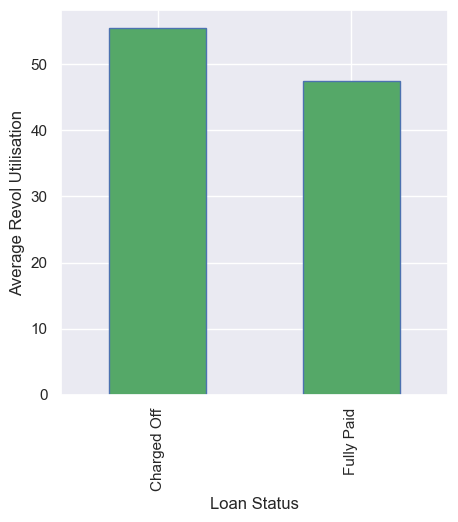

In [304]:
df1.groupby(["loan_status"])["revol_util"].mean().plot(figsize = (5,5), xlabel = "Loan Status", ylabel = "Average Revol Utilisation", kind = 'bar', facecolor ='g' , edgecolor = 'b')

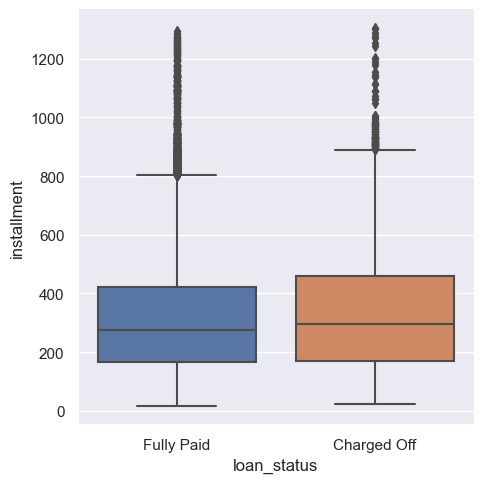

In [305]:
sns.catplot(data=df1, x="loan_status", y="installment", kind="box")

# Bivariate Analysis

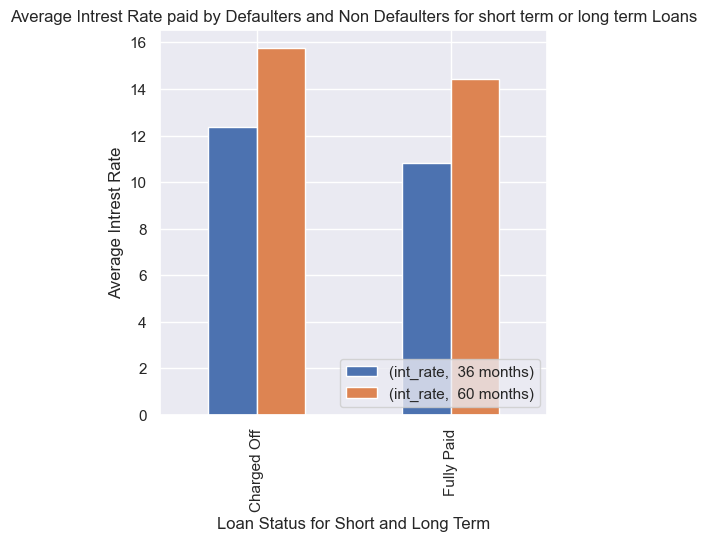

In [306]:
pivot_table = pd.pivot_table(df1, index = "loan_status", columns= "term", values = ["int_rate"], aggfunc = "mean").plot(figsize = (5,5), 
              title = "Average Intrest Rate paid by Defaulters and Non Defaulters for short term or long term Loans", 
              xlabel = "Loan Status for Short and Long Term", ylabel = "Average Intrest Rate",
              kind = 'bar')
plot = plt.gca()
plot.legend(loc = 'lower right')
plt.show()

### Loan taken for higher intrest rate for long term is likely to be unpaid

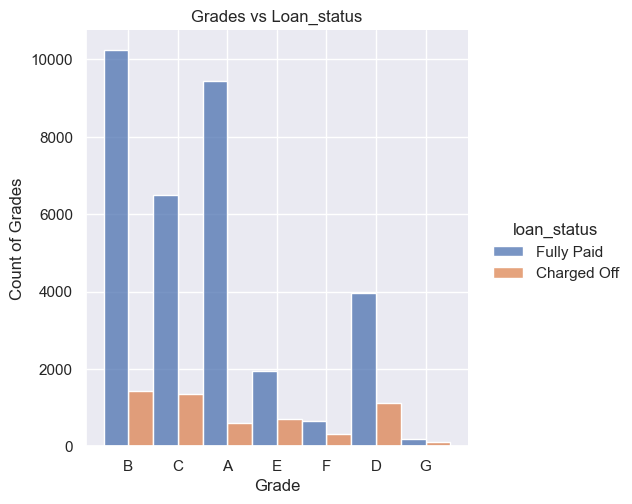

In [307]:
#sns.set_style("whitegrid")
gfg = sns.displot(df1, x="grade", hue="loan_status", multiple="dodge")
gfg.set(xlabel= "Grade", ylabel = "Count of Grades", title = "Grades vs Loan_status")

### E, F and G grade loans are likely to be unpaid , Grade is a quality score assigned to loan applicant on the basis of credit history, quality of collateral and likelihood of repayment

# Revol_util vs Loan_status and emp_length

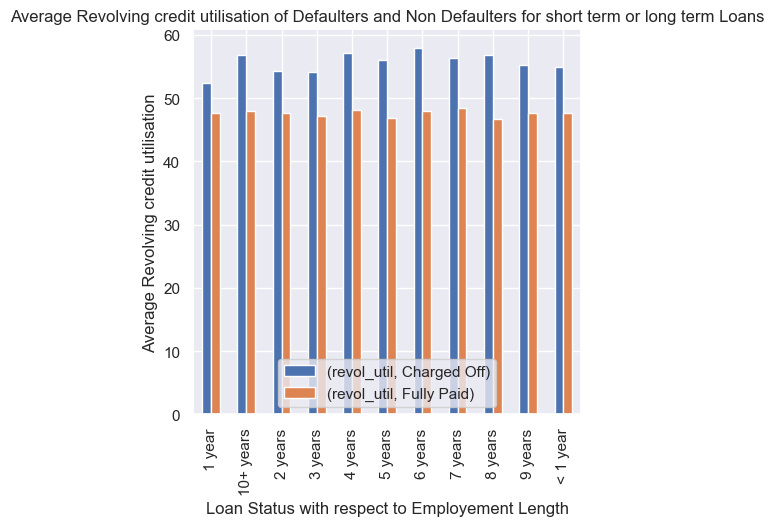

In [308]:
pivot_table = pd.pivot_table(df1, index = "emp_length", columns= "loan_status", 
                        values = ["revol_util"], aggfunc = "mean").plot(figsize = (5,5), 
                        title = "Average Revolving credit utilisation of Defaulters and Non Defaulters for short term or long term Loans",                                                  
                        xlabel = "Loan Status with respect to Employement Length", 
                        ylabel = "Average Revolving credit utilisation", kind = 'bar')
plot = plt.gca()
plot.legend(loc = 'lower center')
plt.show()

## Irrespective of employment length poeple whose average Rovolving credit utilistaion is more are more likely to be default.

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc95061b460>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc95061ba00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc95061b190>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc95061bfa0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9c37742b0>],
 'means': []}

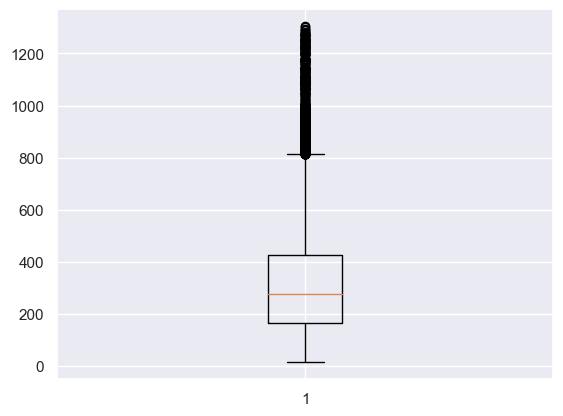

In [309]:
plt.boxplot(df1.installment)

In [310]:
print(df1.home_ownership.value_counts())
df1.home_ownership = df1.home_ownership.replace("NONE","OTHER")

RENT        18480
MORTGAGE    17021
OWN          2975
OTHER          98
NONE            3
Name: home_ownership, dtype: int64


In [311]:
df3 = df1[df1.installment < df1.installment.quantile(.75)] # Remove outliers

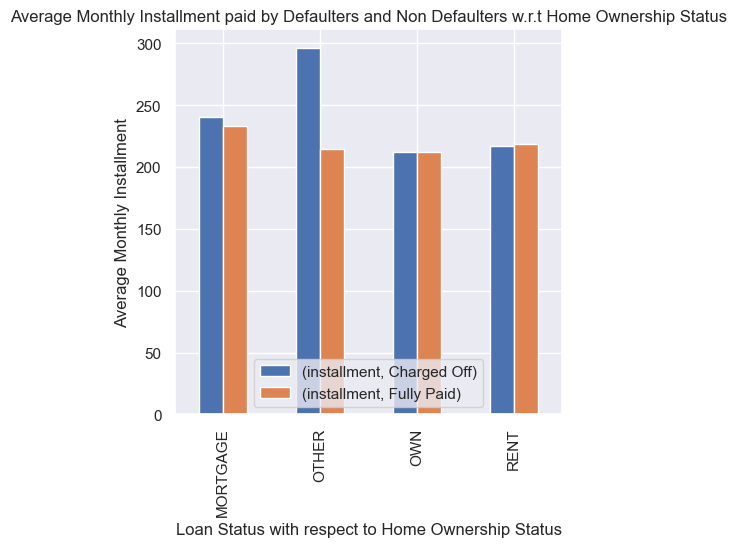

In [312]:
pivot_table = pd.pivot_table(df3, index = "home_ownership", columns= "loan_status", values = ["installment"],
                             aggfunc = "mean").plot(figsize = (5,5), 
                             title = "Average Monthly Installment paid by Defaulters and Non Defaulters w.r.t Home Ownership Status", 
                             xlabel = "Loan Status with respect to Home Ownership Status",
                             ylabel = "Average Monthly Installment", kind = 'bar')
plot = plt.gca()
plot.legend(loc = 'lower center')
plt.show()

# Type Driven 
## Home ownership vs loan_status for Loan_status value count

loan_status     Charged Off  Fully Paid  Default_percent
home_ownership                                          
MORTGAGE               2327       14694               13
OTHER                    18          83               17
OWN                     443        2532               14
RENT                   2839       15641               15


Text(0, 0.5, 'Percentage of Loan Defaulters')

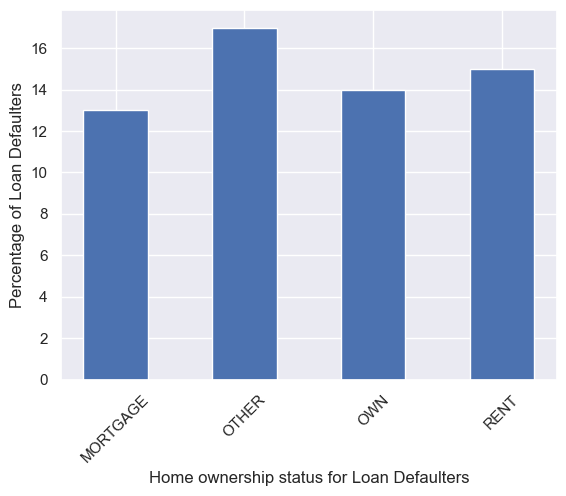

In [378]:
# create new Df and store the pivot_table result and find out the percentage of defaulters with respect 
# to home ownership status
pivot_table = pd.pivot_table(df1, index = ["home_ownership"], columns= "loan_status", 
                             values = "Loan_status_numeric", aggfunc = "count")
pivot_table["Default_percent"] = (pivot_table["Charged Off"] /(pivot_table["Charged Off"] 
                                                               + pivot_table["Fully Paid"]))*100
pivot_table["Default_percent"] = pivot_table["Default_percent"].astype(int) 

print(pivot_table)
pivot_table = pivot_table.reset_index()
plt.bar(pivot_table.home_ownership, pivot_table.Default_percent, width = 0.5, align = 'center')
plt.xticks(rotation=45)
plt.xlabel("Home ownership status for Loan Defaulters")
plt.ylabel("Percentage of Loan Defaulters")

## Above analysis shows the Loan borrower with Home ownership status 'Other' have 17% more chances of loan default

{'whiskers': [<matplotlib.lines.Line2D at 0x7fc9b7d1b9a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc9b7d1bf40>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc9b7d1b6d0>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc9b7d2f520>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc9b7d2f7f0>],
 'means': []}

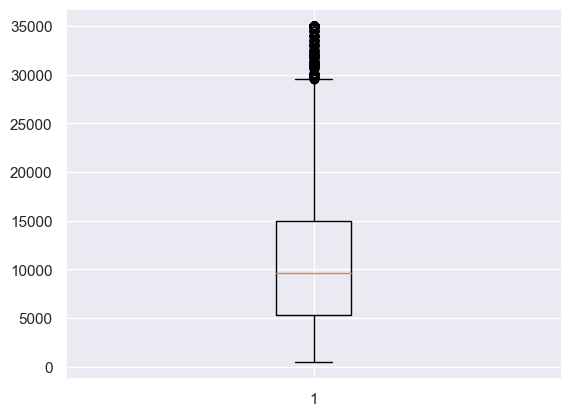

In [314]:
plt.boxplot(df1.loan_amnt)

In [315]:
df2 = df1[df1.loan_amnt < df1.loan_amnt.quantile(.75)] ## Remove Outliers

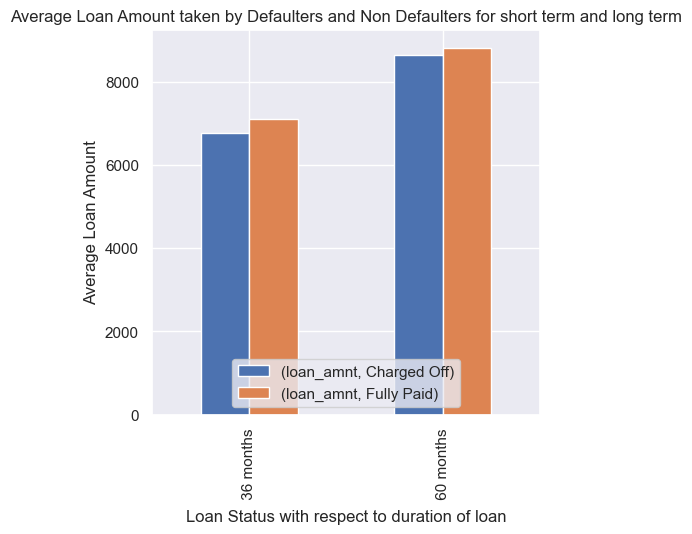

In [316]:
pivot_table = pd.pivot_table(df2, index = "term", columns= "loan_status", values = ["loan_amnt"], 
                             aggfunc = "mean").plot(figsize = (5,5), 
                             title = "Average Loan Amount taken by Defaulters and Non Defaulters for short term and long term",
                             xlabel = "Loan Status with respect to duration of loan", 
                             ylabel = "Average Loan Amount", kind = 'bar')
plot = plt.gca()
plot.legend(loc = 'lower center')
plt.show()

## Loan Borrowers with Home ownership status as OTHER and have taken big loan amount and  and higher installments are more likely to be unpaid.

# Annual Income category vs Loan Status vs Interest Rate

In [317]:
def annual_incom_cat(n):
    if 0 < n <= df1.annual_inc.quantile(.25):
        return 'low_income'
    elif df1.annual_inc.quantile(.25) < n <= df1.annual_inc.quantile(.75):
        return 'average_income'
    elif n > df1.annual_inc.quantile(.75):
        return 'high_income'
    
df1["annual_income_category"] = df1["annual_inc"].apply(lambda x: annual_incom_cat(x)) 

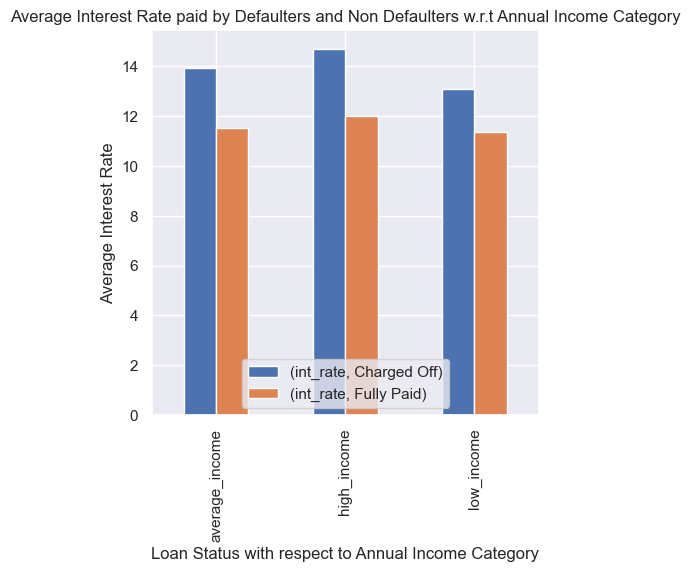

In [318]:
pivot_table = pd.pivot_table(df1, index = "annual_income_category", columns= "loan_status", values = ["int_rate"], 
                             aggfunc = "mean").plot(figsize = (5,5), 
                             title = "Average Interest Rate paid by Defaulters and Non Defaulters w.r.t Annual Income Category",
                             xlabel = "Loan Status with respect to Annual Income Category", 
                             ylabel = "Average Interest Rate", kind = 'bar')
plot = plt.gca()
plot.legend(loc = 'lower center')
plt.show()

## Check corr of every variable

<AxesSubplot:>

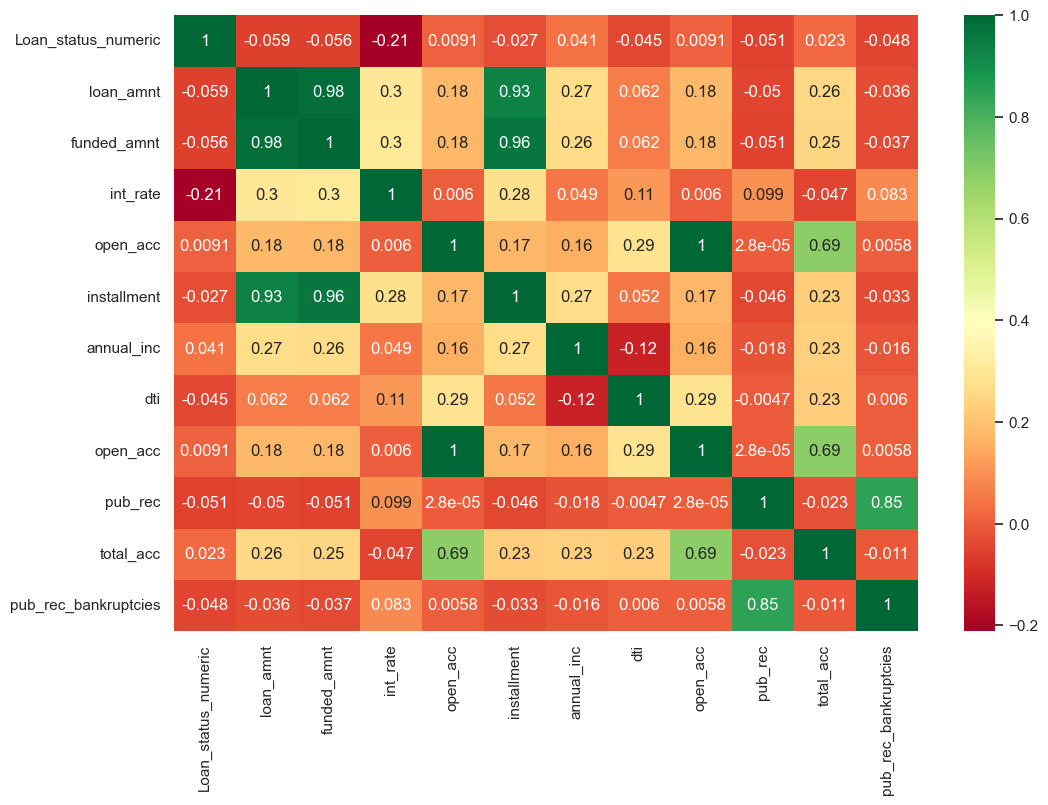

In [319]:
df5 = df1.filter(["Loan_status_numeric", "loan_amnt","funded_amnt","int_rate","open_acc", "installment","annual_inc","dti", "open_acc", "pub_rec", "total_acc", "pub_rec_bankruptcies"], axis = 1)
plt.figure(figsize=(12, 8))
sns.heatmap(df5.corr(), annot=True, cmap='RdYlGn')

## Business Driven Column ####
Loan to annual income ratio 



In [369]:
#loan_percent_wrt_income : percentage of loan amount with respect to annual income

df1["loan_percent_wrt_income"] = (df1["loan_amnt"] /(df1["annual_inc"]))*100 
df1["loan_percent_wrt_income"] = df1["loan_percent_wrt_income"].astype(int) 

# Divide loan_percent_wrt_income values in different categories from low -- mid -- high
def loan_vs_income_grading(x):
    if 0 < x <=25:
        return "low_loan_to_income_ratio"
    elif 25 < x < 50:
        return "medium_loan_to_income_ratio"
    else :
        return "high_loan_to_income_ratio"

    
df1["loan_vs_income_ratio_cat"]  =  df1["loan_percent_wrt_income"].apply(lambda x: loan_vs_income_grading(x))    

Text(0, 0.5, 'Percentage of Loan Defaulters')

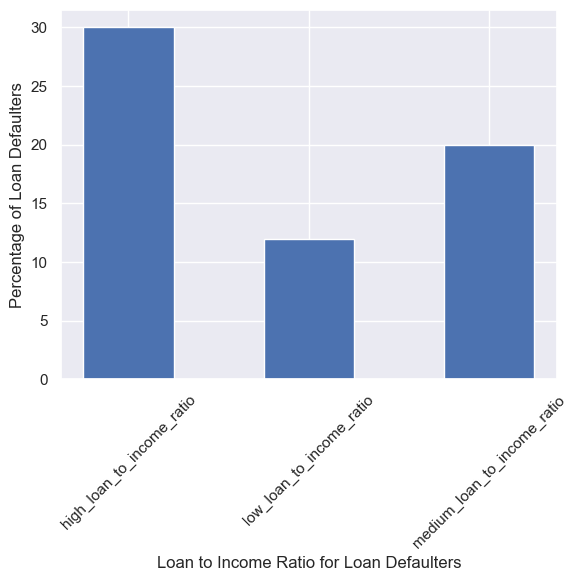

In [374]:

newdf = pd.pivot_table(df1, index = "loan_vs_income_ratio_cat", columns= "loan_status", values = "Loan_status_numeric", 
                             aggfunc = "count")

newdf["chargedOff_percent"] = ((newdf["Charged Off"]/(newdf["Charged Off"] + newdf["Fully Paid"]))*100)
newdf["chargedOff_percent"] = newdf["chargedOff_percent"].astype(int) 
newdf = newdf.reset_index()
plt.bar(newdf.loan_vs_income_ratio_cat, newdf.chargedOff_percent, width = 0.5, align = 'center')
plt.xticks(rotation=45)
plt.xlabel("Loan to Income Ratio for Loan Defaulters")
plt.ylabel("Percentage of Loan Defaulters")


# Conclusion / Result


# Important variables that can be used as indicator to find whether a person will default or not
### 1. Interest Rate
### 2. Grade : Loan score assigned by bank
### 3. Home ownership Status
### 4. Revolving credit utilisation
### 5. Loan to Annual Income ratio

In [ ]:
######### End of File ###########